In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

import sklearn.metrics as metrics
from sklearn.model_selection import learning_curve


In [39]:
#Leemos el archivo .xlxs
df2=pd.read_excel('E-Commerce_train.xlsx')
df2

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,D,Ship,3,1,217,3,low,F,1,4177,1
8995,8996,F,Ship,5,3,232,3,medium,M,3,4526,0
8996,8997,A,Ship,4,5,260,3,medium,F,6,4221,0
8997,8998,B,Ship,4,2,184,3,medium,F,5,5931,1


In [41]:
test=pd.read_excel('E-Commerce_test.xlsx')
test

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,9000,F,Ship,5,1,189,2,medium,M,10,5248
1,9001,D,Ship,5,3,150,2,high,F,9,4446
2,9002,F,Ship,3,3,200,3,low,M,3,5739
3,9003,A,Ship,5,1,133,2,medium,M,1,4643
4,9004,B,Ship,4,2,260,3,low,M,4,5504
...,...,...,...,...,...,...,...,...,...,...,...
1995,10995,A,Ship,4,1,252,5,medium,F,1,1538
1996,10996,B,Ship,4,1,232,5,medium,F,6,1247
1997,10997,C,Ship,5,4,242,5,low,F,4,1155
1998,10998,F,Ship,5,2,223,6,medium,M,2,1210


Tenemos un dataframe de 8999 filas y 12 campos, nuestro campo "target" será Reached on Time

In [42]:
#Creamos una copia del dataframe original
df=df2.copy()

Quitamos la columna ID y asignamos la columna "target"

In [43]:
df.drop(columns='ID', inplace=True)
df.rename({'Reached.on.Time_Y.N':'target'}, axis=1, inplace=True)


Analizando el dataframe, tenemos cuatro campos con valores tipo str que habrá que codificar para poder procesarlos.

In [60]:
print(df.Warehouse_block.unique(), 
df.Mode_of_Shipment.unique(), 
df.Product_importance.unique(), 
df.Gender.unique())

['D' 'F' 'A' 'B' 'C'] ['Flight' 'Ship' 'Road'] ['low' 'medium' 'high'] ['F' 'M']


Procesamos estos campos con LaberEncoder para obtener un dataframe codificado

In [44]:
# Primero para Gender F=0 M=1
df['Gender'] = df['Gender'].map({'F':0,'M':1})

In [45]:
from sklearn.preprocessing import LabelEncoder

#Shipment (Flight=0, road=1 o ship=2)

Shipment=df['Mode_of_Shipment'].values
enc=LabelEncoder().fit(Shipment)

Shipment=enc.transform(Shipment)
Shipment=pd.DataFrame(Shipment)


In [46]:
df.drop(columns="Mode_of_Shipment", inplace=True)
df.insert(1,'Mode_of_Shipment', Shipment)


In [47]:
#Warehouse_block (D=3,F=4,A=0,B=1,C=2)

Warehouse_block=df['Warehouse_block'].values
enc=LabelEncoder().fit(Warehouse_block)

Warehouse_block=enc.transform(Warehouse_block)
Warehouse_block=pd.DataFrame(Warehouse_block)

In [48]:
df.drop(columns="Warehouse_block", inplace=True)
df.insert(0,'Warehouse_block', Warehouse_block)


In [49]:
#Product_importance (low=1, medium=2, high=0)

Product_importance=df['Product_importance'].values
enc=LabelEncoder().fit(Product_importance)

Product_importance=enc.transform(Product_importance)
Product_importance=pd.DataFrame(Product_importance)

In [50]:
df.drop(columns="Product_importance", inplace=True)
df.insert(6,'Product_importance', Product_importance)
df

Revisamos el balanceo de la variable de salida

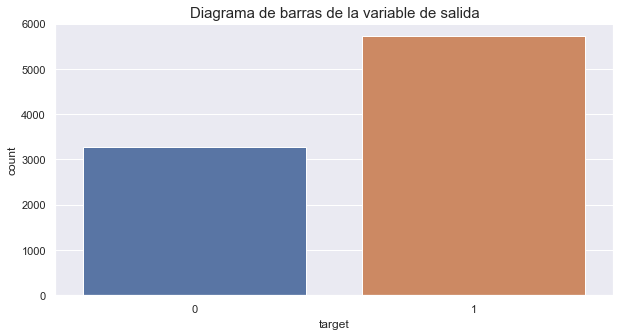

In [66]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'target' ,label= 'Count', data = df)
plt.title('Diagrama de barras de la variable de salida', fontsize = 15)
plt.show()

Vamos a hacer un oversample de la clase minoritaria, es decir las veces que no se entregó el paquete.

In [ ]:
from imblearn import under_sampling
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Hacemos un pairplot y un heatmap para ver la correlación entre las variables

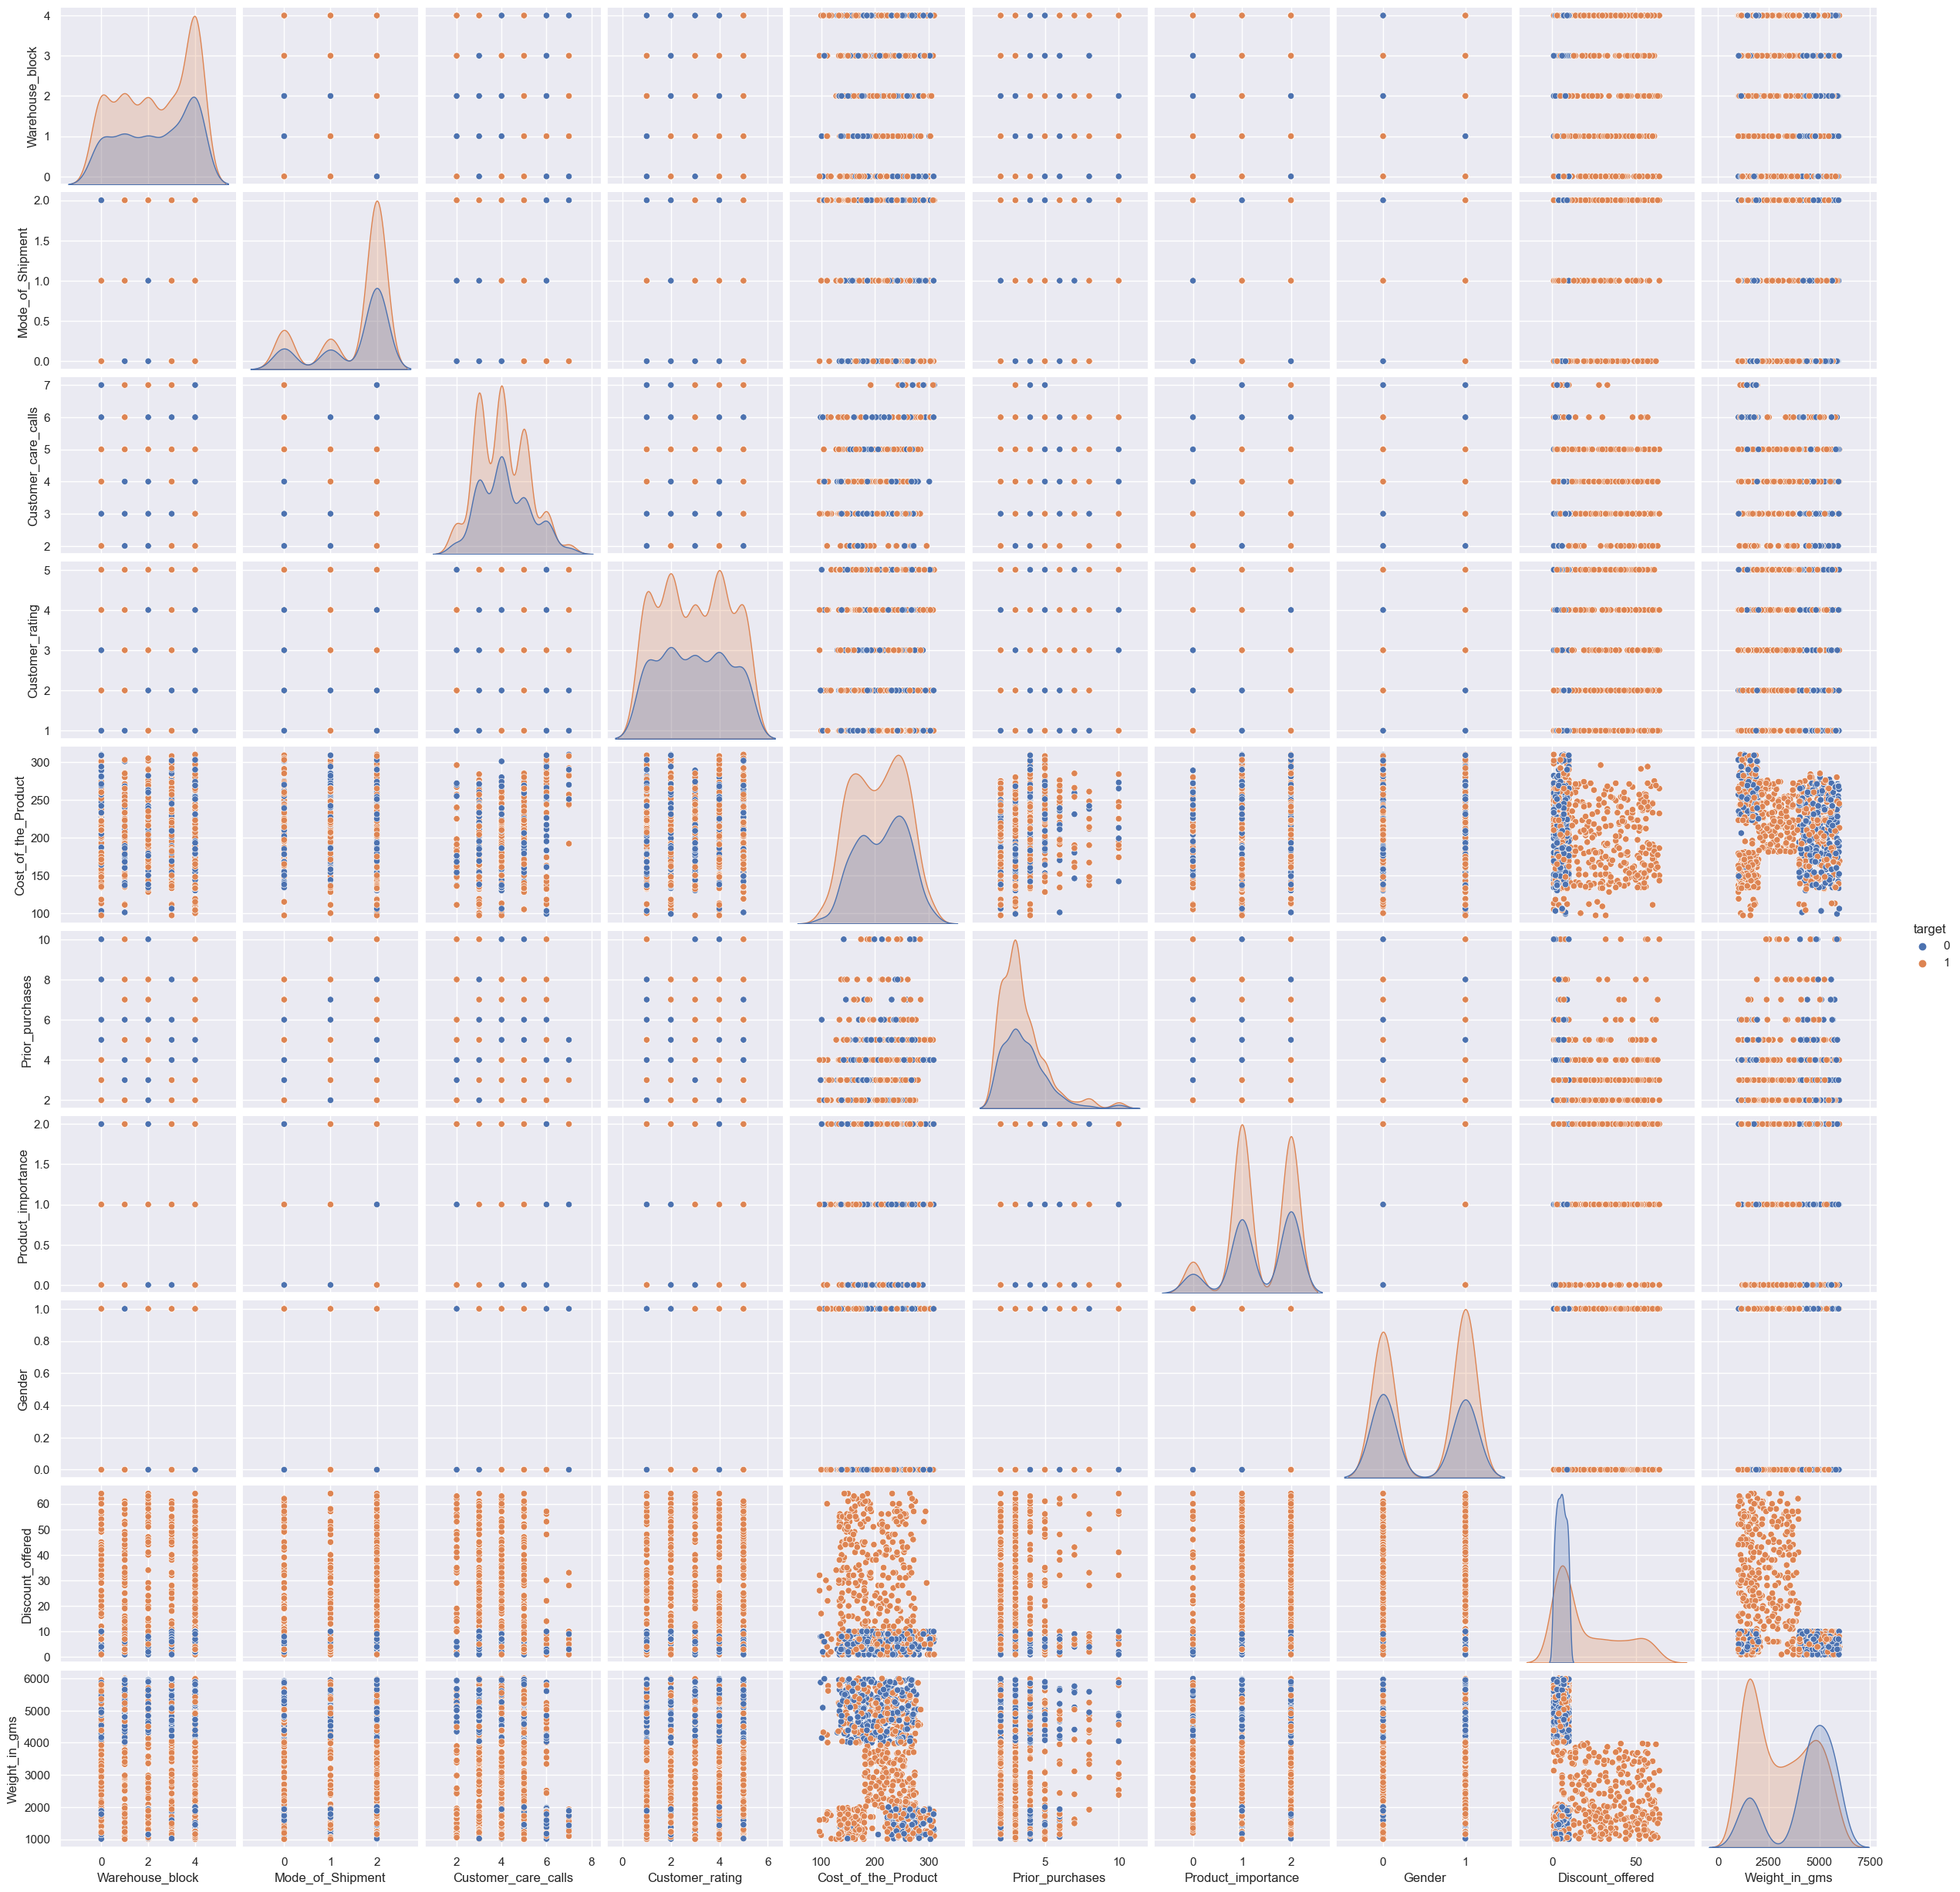

In [77]:
sns.pairplot(df.sample(frac = 0.1), hue = 'target')
plt.show()

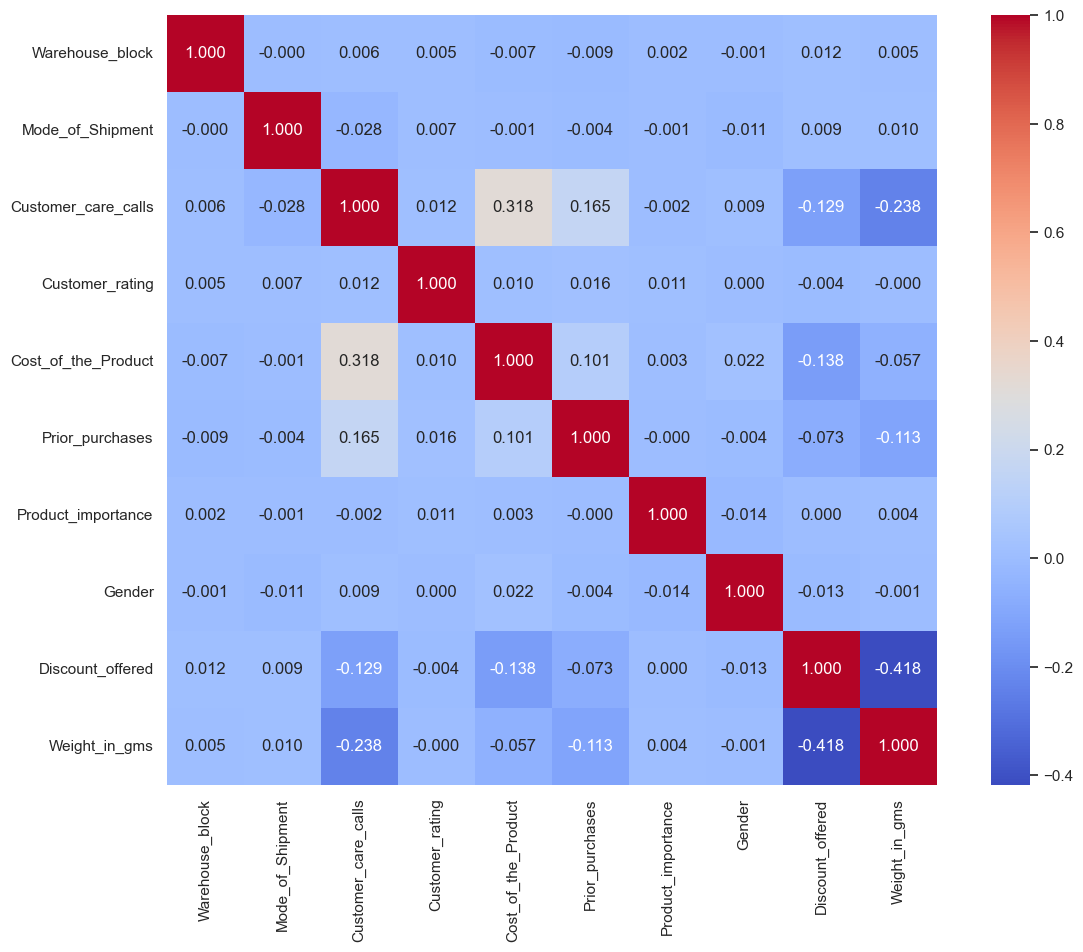

In [78]:
# Hacemos un mapa de calor

corr = df.drop(columns = ['target']).corr(method='pearson')
plt.figure(figsize=(14,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.3f',annot_kws={'size': 12},
           xticklabels= df.drop(columns = ['target']).columns, 
           yticklabels= df.drop(columns = ['target']).columns,
           cmap= 'coolwarm')

plt.show()

Luego de ver las correlaciones concluimos que no hay columnas redudantes que se puedan descartar.

In [51]:
# Elegimos variables de entrenamiento (empezamos con tres) y separamos las etiquetas

#columnas_entrenamiento = ['Discount_offered',  'Weight_in_gms', 'Cost_of_the_Product']
#X = df[columnas_entrenamiento]
X = df.drop(columns = 'target')
y = df.target

In [52]:
# Generamos un modelo que diga siempre que NO va a llegar el paquete y medimos su exactitud

y_pred = np.zeros(y.shape)
accuracy_ceros = metrics.accuracy_score(y,y_pred)
print(accuracy_ceros)

0.3644849427714191


In [53]:
# Generamos otro modelo que diga siempre que SÍ va a llegar el paquete y medimos su exactitud

y_pred = np.ones(y.shape)
accuracy_unos = metrics.accuracy_score(y,y_pred)
print(accuracy_unos)

0.6355150572285809


In [64]:
# Separamos nuestros datos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100, stratify = y)

**Vamos a entrenar distintos árboles y mostrarles distintas porciones del dataset**

In [142]:
lista_de_modelos = []
N_modelos = 20

for i in range(N_modelos):
    X_train_boostrap, _, y_train_boostrap, _ = train_test_split(X_train, y_train, test_size=0.5, stratify = y_train)
    clf = DecisionTreeClassifier(max_depth = 4) #Nivel del árbol
    clf.fit(X_train_boostrap, y_train_boostrap)
    lista_de_modelos.append(clf)

In [143]:
# Evaluamos cada modelo en hold-out

for idx, modelo in enumerate(lista_de_modelos):
    y_test_pred = modelo.predict(X_test)
    print('Accuracy Modelo ', idx, ' es ', metrics.accuracy_score(y_test, y_test_pred))

Accuracy Modelo  0  es  0.6911111111111111
Accuracy Modelo  1  es  0.6914814814814815
Accuracy Modelo  2  es  0.6825925925925926
Accuracy Modelo  3  es  0.6885185185185185
Accuracy Modelo  4  es  0.6940740740740741
Accuracy Modelo  5  es  0.6955555555555556
Accuracy Modelo  6  es  0.6818518518518518
Accuracy Modelo  7  es  0.6818518518518518
Accuracy Modelo  8  es  0.6781481481481482
Accuracy Modelo  9  es  0.6911111111111111
Accuracy Modelo  10  es  0.6866666666666666
Accuracy Modelo  11  es  0.6851851851851852
Accuracy Modelo  12  es  0.6877777777777778
Accuracy Modelo  13  es  0.6818518518518518
Accuracy Modelo  14  es  0.6896296296296296
Accuracy Modelo  15  es  0.6911111111111111
Accuracy Modelo  16  es  0.6874074074074074
Accuracy Modelo  17  es  0.6788888888888889
Accuracy Modelo  18  es  0.6944444444444444
Accuracy Modelo  19  es  0.6885185185185185


**Evaluemos, ahora, el accuracy de todo el ensamble usando el conjunto de hold-out. Lo haremos con el promedio de las probabilidades que devuelve cada árbol. Si la probabilidad promedio es mayor a 0.5, clasificamos como positivo**.

In [139]:
probs_test_pred = np.ones(y_test.size)

In [140]:
# Recorremos la lista y predecimos las probabilidades

for modelo in lista_de_modelos:
    probs_test_pred_modelo = modelo.predict_proba(X_test)
    #print(probs_test_pred_modelo.shape)
    probs_test_pred +=probs_test_pred_modelo[:,1]

In [141]:
probs_test_pred = probs_test_pred/N_modelos

y_test_pred = probs_test_pred>0.5
y_test_pred = y_test_pred.astype(int)

print('Accuracy del ensamble: ', metrics.accuracy_score(y_test, y_test_pred))

Accuracy del ensamble:  0.6403703703703704


### `Usemos Bagging Classifier`

In [154]:
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap_features=False, n_estimators= 100, n_jobs = -1)
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

1.0
0.6881481481481482


### `Usemos Random Forest`

In [155]:
from sklearn.ensemble import RandomForestClassifier

# Instanciamos el modelo

clf = RandomForestClassifier(n_estimators=100, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 42)
clf.fit(X_train,y_train)

# Evaluamos

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

1.0
0.6892592592592592


In [159]:
# Elegimos, aleatoriamente, uno de los árboles del bosque
clf_tree = clf.estimators_[2]
clf_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1935803228,
 'splitter': 'best'}

In [160]:
# Predecimos y evaluamos en train y test

y_train_pred = clf_tree.predict(X_train)
y_test_pred = clf_tree.predict(X_test)
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.8833148118749008
0.6437037037037037


c:\Users\Jhovany Lara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Jhovany Lara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [161]:
train_accuracy = []
test_accuracy = []
oob_scores = []

N_estimadores = [1,2,3,4,5,10,25,50,100,250,500,1000]
for estimadores in N_estimadores:
    print(estimadores)
    clf = RandomForestClassifier(n_estimators=estimadores, n_jobs=-1, oob_score= True, random_state = 42)
    clf.fit(X_train,y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_accuracy.append(metrics.accuracy_score(y_train, y_train_pred))
    test_accuracy.append(metrics.accuracy_score(y_test, y_test_pred))
    oob_scores.append(clf.oob_score_)
    
train_accuracy = np.array(train_accuracy)
test_accuracy = np.array(test_accuracy)
oob_scores = np.array(oob_scores)

1
2
3


c:\Users\Jhovany Lara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Jhovany Lara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Jhovany Lara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


4


c:\Users\Jhovany Lara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


5


c:\Users\Jhovany Lara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


10


c:\Users\Jhovany Lara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


25
50
100
250
500
1000


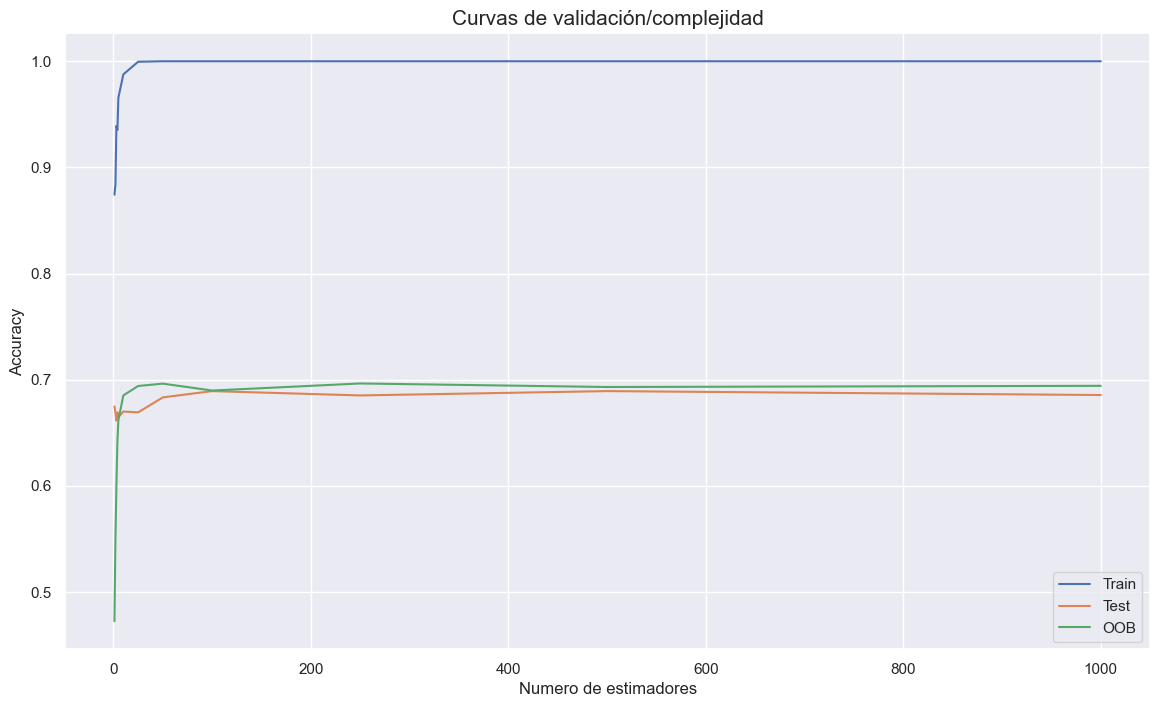

In [162]:
plt.figure(figsize = (14,8))
plt.plot(N_estimadores, train_accuracy, label = 'Train')
plt.plot(N_estimadores, test_accuracy, label = 'Test')
plt.plot(N_estimadores, oob_scores, label = 'OOB')
plt.xlabel('Numero de estimadores')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Curvas de validación/complejidad', fontsize = 15)
# plt.xlim(0,50)
plt.show()

### Probemos un modelo Random Forest con 250 árboles

In [163]:
# Tengamos paciencia que esto lleva su tiempo :)
import time

comienzo = time.time()
clf = RandomForestClassifier(n_estimators=250, n_jobs=-1, oob_score= True, random_state = 42)

train_sizes, train_scores, valid_scores = learning_curve(clf, X_train, y_train, 
                                                         train_sizes = np.linspace(0.0001,1,10),
                                                         scoring = 'accuracy', cv=5)
fin = time.time() - comienzo

print(f'Tardó {round(fin)} segundos')

c:\Users\Jhovany Lara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Jhovany Lara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Jhovany Lara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Jhovany Lara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimat

Tardó 204 segundos


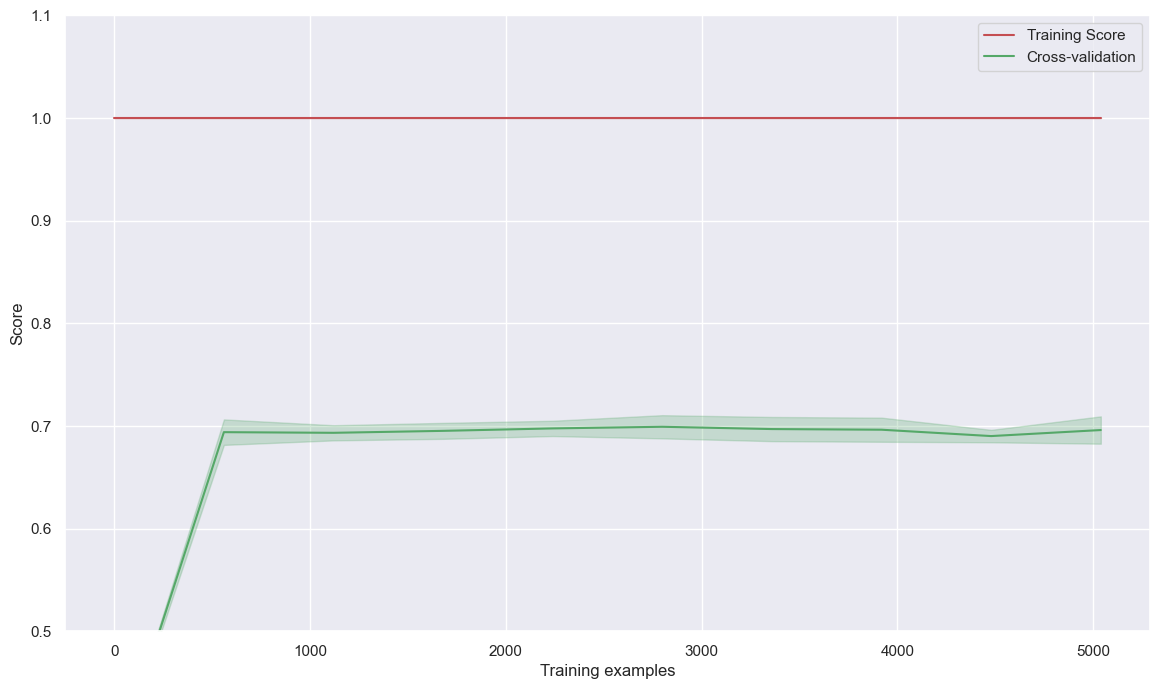

In [164]:
# Graficamos la curva de aprendizaje

plt.figure(figsize = (14,8))
plt.plot(train_sizes, train_scores.mean(axis = 1), color = 'r')
plt.plot(train_sizes, valid_scores.mean(axis = 1), color = 'g')

plt.fill_between(train_sizes, train_scores.mean(axis = 1)- train_scores.std(axis = 1),
                     train_scores.mean(axis = 1)+ train_scores.std(axis = 1), alpha=0.25,
                     color="r")
plt.fill_between(train_sizes, valid_scores.mean(axis = 1) - valid_scores.std(axis = 1),
                     valid_scores.mean(axis = 1) + valid_scores.std(axis = 1), alpha=0.25, color="g")

plt.ylim(0.5,1.1)
plt.legend(['Training Score','Cross-validation'])
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.show()

Construcción de 3 Pipelines

In [27]:
# Importamos las librerías necesarias

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree

In [28]:
# Creamos el primer pipeline con regresion logística

pipe_lr = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', LogisticRegression(random_state=42))])

In [29]:
# Creamos el segundo pipeline con SVM

pipe_svm = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', svm.SVC(random_state=42))])

In [30]:
# Creamos el tercer pipeline con tree classifier

pipe_dt = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', tree.DecisionTreeClassifier(random_state=42))])

In [31]:
# Los guardamos en una lista

pipelines = [pipe_lr, pipe_svm, pipe_dt]

In [32]:
# Hacemos un diccionario para fines organizativos

pipe_dict = {0: 'Regresión Logística', 1: 'SVM', 2: 'Árbol de decisión'}

In [33]:
# Entrenamos

for pipe in pipelines:
	pipe.fit(X_train, y_train)

In [34]:
# Evaluamos

for idx, val in enumerate(pipelines):
	print('%s pipeline accuracy en test: %.3f' % (pipe_dict[idx], val.score(X_test, y_test)))

Regresión Logística pipeline accuracy en test: 0.674
SVM pipeline accuracy en test: 0.691
Árbol de decisión pipeline accuracy en test: 0.656


In [35]:
# Identificamos el mejor modelo para el set de testeo

best_acc = 0.0
best_clf = 0
best_pipe = ''
for idx, val in enumerate(pipelines):
	if val.score(X_test, y_test) > best_acc:
		best_acc = val.score(X_test, y_test)
		best_pipe = val
		best_clf = idx
print('Modelo con el mejor accuracy: %s' % pipe_dict[best_clf])

Modelo con el mejor accuracy: SVM
